#### Jupiter Notebook created by Pietro to test Tisserand Plane for GA sequences design. Required modules: astropy, poliastro

{'Sun': '#ffcc00', 'Mercury': '#8c8680', 'Venus': '#e6db67', 'Earth': '#2a7bd1', 'Moon': '#999999', 'Mars': '#cc653f', 'Jupiter': '#bf8f5c', 'Saturn': '#decf83', 'Uranus': '#7ebec2', 'Neptune': '#3b66d4'}
TisserandKind.APSIS	TisserandKind.ENERGY	TisserandKind.PERIOD	

'\n# Let us import the rest of the planets\nfrom poliastro.bodies import Mercury, Jupiter, Saturn, Uranus, Neptune\n\nSS_BODIES_INNER = [\n    Mercury,\n    Venus,\n    Earth,\n    Mars,\n]\nSS_BODIES_OUTTER = [\n    Jupiter,\n    Saturn,\n    Uranus,\n    Neptune,\n]\n\n# Prellocate Tisserand figure\nfig, ax = plt.subplots(1, 1, figsize=(15, 7))\nax.set_title("Apsis Tisserand for Solar System bodies")\nax.set_xlabel("$R_{a} [AU]$")\nax.set_ylabel("$R_{p} [AU]$")\nax.set_xscale("log")\nax.set_yscale("log")\n\n# Build tisserand\ntp = TisserandPlotter(axes=ax, kind=TisserandKind.APSIS)\n\n# Show perfect circular orbits\nr = np.linspace(0, 10**2) * u.AU\ntp.ax.plot(r, r, linestyle="--", color="red")\n\n# Generate lines for inner planets\nfor planet in SS_BODIES_INNER:\n    tp.plot(planet, (1, 12) * u.km / u.s, num_contours=12)\n\n# Generate lines for outter planets\nfor planet in SS_BODIES_OUTTER:\n    if planet == Jupiter or planet == Saturn:\n        tp.plot(planet, (1, 7) * u.km / u.s,

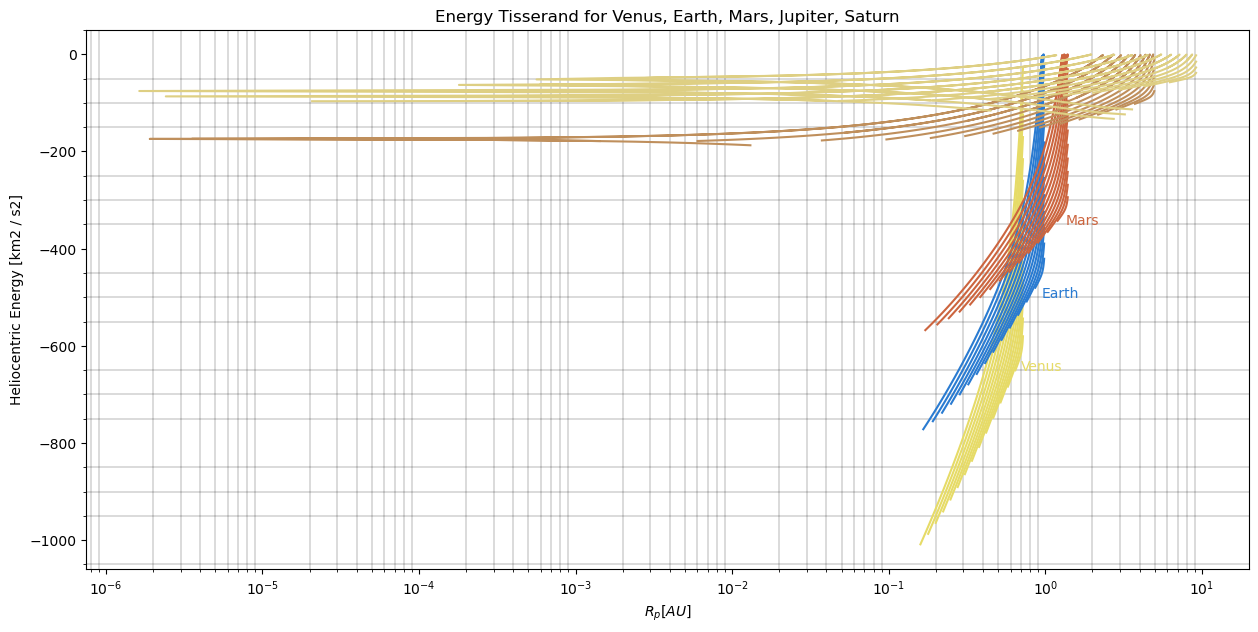

In [20]:
from astropy import units as u
from matplotlib import pyplot as plt
import numpy as np

from poliastro.bodies import Venus, Earth, Mars, Jupiter, Saturn
from poliastro.plotting.tisserand import TisserandPlotter, TisserandKind
from poliastro.plotting._base import BODY_COLORS



print(BODY_COLORS)

# Show all possible Tisserand kinds
for kind in TisserandKind:
    print(f"{kind}", end="\t")

# Build custom axis
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Energy Tisserand for Venus, Earth, Mars, Jupiter, Saturn")
ax.set_xlabel("$R_{p} [AU]$")
ax.set_ylabel("Heliocentric Energy [km2 / s2]")
ax.set_xscale("log")
#ax.set_xlim(10**-0.4, 10**0.15)
#ax.set_ylim(-700, 0)
ax.grid(which='major', color='black', linewidth=0.6)
ax.grid(which='minor', color='black', linewidth=0.2)
ax.minorticks_on()
ax.grid()

# Generate a Tisserand plotter using [Specific Energy VS. Periapsis] plot
tp = TisserandPlotter(axes=ax, kind=TisserandKind.ENERGY)

# Plot Tisserand lines within 1km/s and 10km/s
for planet in [Venus, Earth, Mars, Jupiter, Saturn]:
    ax = tp.plot(planet, (1, 14) * u.km / u.s, num_contours=14)

# Let us label previous figure
tp.ax.text(0.70, -650, "Venus", color=BODY_COLORS["Venus"])
tp.ax.text(0.95, -500, "Earth", color=BODY_COLORS["Earth"])
tp.ax.text(1.35, -350, "Mars", color=BODY_COLORS["Mars"])

'''
# Plot final desired path by making use of `plot_line` method
ax = tp.plot_line(
    Venus,
    7 * u.km / u.s,
    alpha_lim=(47 * np.pi / 180, 78 * np.pi / 180),
    color="black",
)
ax = tp.plot_line(
    Mars,
    5 * u.km / u.s,
    alpha_lim=(119 * np.pi / 180, 164 * np.pi / 180),
    color="black",
)
'''
'''
# Let us import the rest of the planets
from poliastro.bodies import Mercury, Jupiter, Saturn, Uranus, Neptune

SS_BODIES_INNER = [
    Mercury,
    Venus,
    Earth,
    Mars,
]
SS_BODIES_OUTTER = [
    Jupiter,
    Saturn,
    Uranus,
    Neptune,
]

# Prellocate Tisserand figure
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Apsis Tisserand for Solar System bodies")
ax.set_xlabel("$R_{a} [AU]$")
ax.set_ylabel("$R_{p} [AU]$")
ax.set_xscale("log")
ax.set_yscale("log")

# Build tisserand
tp = TisserandPlotter(axes=ax, kind=TisserandKind.APSIS)

# Show perfect circular orbits
r = np.linspace(0, 10**2) * u.AU
tp.ax.plot(r, r, linestyle="--", color="red")

# Generate lines for inner planets
for planet in SS_BODIES_INNER:
    tp.plot(planet, (1, 12) * u.km / u.s, num_contours=12)

# Generate lines for outter planets
for planet in SS_BODIES_OUTTER:
    if planet == Jupiter or planet == Saturn:
        tp.plot(planet, (1, 7) * u.km / u.s, num_contours=7)
    else:
        tp.plot(planet, (1, 5) * u.km / u.s, num_contours=10)


'''

{'Sun': '#ffcc00', 'Mercury': '#8c8680', 'Venus': '#e6db67', 'Earth': '#2a7bd1', 'Moon': '#999999', 'Mars': '#cc653f', 'Jupiter': '#bf8f5c', 'Saturn': '#decf83', 'Uranus': '#7ebec2', 'Neptune': '#3b66d4'}
TisserandKind.APSIS	TisserandKind.ENERGY	TisserandKind.PERIOD	

C:\Users\pietr\AppData\Local\Temp\ipykernel_34972\3098380616.py:107: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='k', linestyle='-', linewidth=0.8)
C:\Users\pietr\AppData\Local\Temp\ipykernel_34972\3098380616.py:109: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='k', linestyle='--', linewidth=0.8)


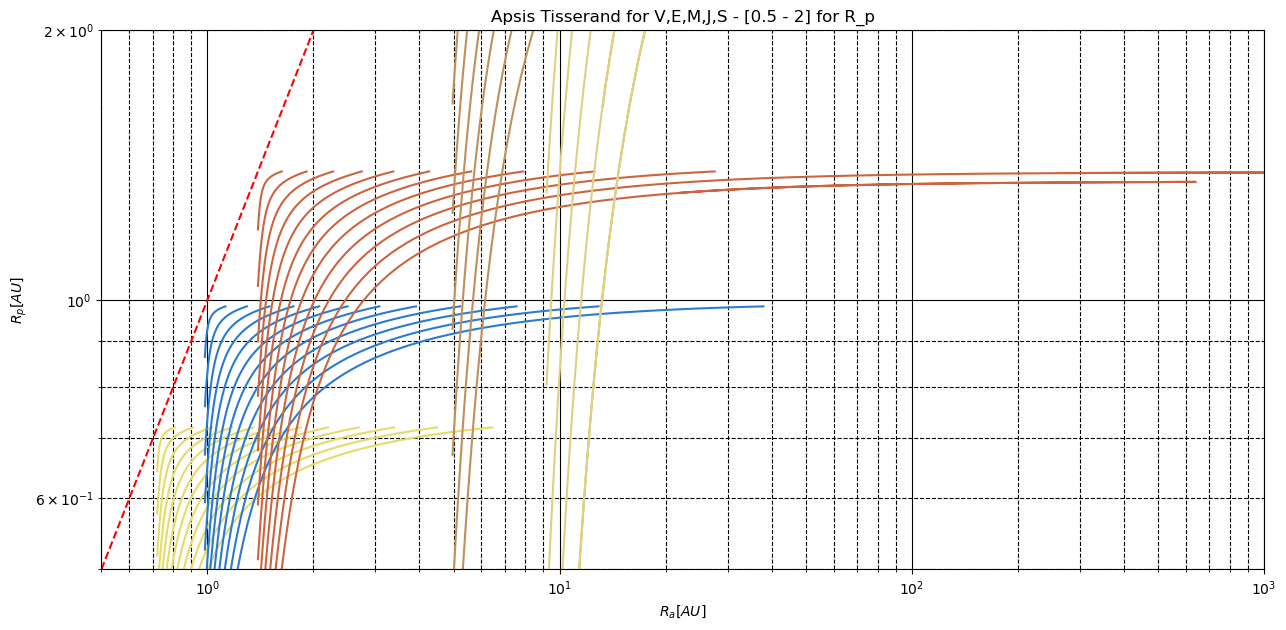

In [45]:
from poliastro.bodies import Mercury, Jupiter, Saturn, Uranus, Neptune
from astropy import units as u
from matplotlib import pyplot as plt
import numpy as np

from poliastro.bodies import Venus, Earth, Mars, Jupiter, Saturn
from poliastro.plotting.tisserand import TisserandPlotter, TisserandKind
from poliastro.plotting._base import BODY_COLORS



print(BODY_COLORS)

# Show all possible Tisserand kinds
for kind in TisserandKind:
    print(f"{kind}", end="\t")
'''
# Build custom axis
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Energy Tisserand for Venus, Earth, Mars, Jupiter, Saturn")
ax.set_xlabel("$R_{p} [AU]$")
ax.set_ylabel("Heliocentric Energy [km2 / s2]")
ax.set_xscale("log")
#ax.set_xlim(10**-0.4, 10**0.15)
#ax.set_ylim(-700, 0)
ax.grid(which='major', color='black', linewidth=0.6)
ax.grid(which='minor', color='black', linewidth=0.2)
ax.minorticks_on()
ax.grid()

# Generate a Tisserand plotter using [Specific Energy VS. Periapsis] plot
tp = TisserandPlotter(axes=ax, kind=TisserandKind.ENERGY)

# Plot Tisserand lines within 1km/s and 10km/s
for planet in [Venus, Earth, Mars, Jupiter, Saturn]:
    ax = tp.plot(planet, (1, 14) * u.km / u.s, num_contours=14)

# Let us label previous figure
tp.ax.text(0.70, -650, "Venus", color=BODY_COLORS["Venus"])
tp.ax.text(0.95, -500, "Earth", color=BODY_COLORS["Earth"])
tp.ax.text(1.35, -350, "Mars", color=BODY_COLORS["Mars"])
SS_BODIES_INNER = [
    Venus,
    Earth,
    Mars,
]
SS_BODIES_OUTTER = [
    Jupiter,
    Saturn,
]

'''
'''
# Prellocate Tisserand figure
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Apsis Tisserand for Solar System bodies")
ax.set_xlabel("$R_{a} [AU]$")
ax.set_ylabel("$R_{p} [AU]$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(1)

# Build tisserand
# APSIS: R_p vs R_a
# ENERGY: R_p vs Helio Specific Energy 
# PERIOD: vs PERIOD
tp = TisserandPlotter(axes=ax, kind=TisserandKind.APSIS)

# Show perfect circular orbits
r = np.linspace(0, 10**2) * u.AU
tp.ax.plot(r, r, linestyle="--", color="red")

# Generate lines for inner planets
for planet in SS_BODIES_INNER:
    tp.plot(planet, (1, 12) * u.km / u.s, num_contours=12)

# Generate lines for outter planets
for planet in SS_BODIES_OUTTER:
    if planet == Jupiter or planet == Saturn:
        tp.plot(planet, (1, 9) * u.km / u.s, num_contours=9) #Specify number and value of V_inf for <planet> entry
    else:
        tp.plot(planet, (1, 6) * u.km / u.s, num_contours=6)
'''

SS_BODIES_INNER = [
    Venus,
    Earth,
    Mars,
]

SS_BODIES_OUTER = [
    Jupiter,
    Saturn,
]

# MARS, EARTH, VENUS, JUPITER, SATURN 
# Prellocate Tisserand figure
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Apsis Tisserand for V,E,M,J,S - [0.5 - 2] for R_p")
ax.set_xlabel("$R_{a} [AU]$")
ax.set_ylabel("$R_{p} [AU]$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim((0.5, 10**3))
ax.set_ylim((0.5, 2))

ax.grid(b=True, which='major', color='k', linestyle='-', linewidth=0.8)

ax.grid(b=True, which='minor', color='k', linestyle='--', linewidth=0.8)
# Build tisserand
# APSIS: R_p vs R_a
# ENERGY: R_p vs Helio Specific Energy 
# PERIOD: vs PERIOD
tp = TisserandPlotter(axes=ax, kind=TisserandKind.APSIS)

# Show perfect circular orbits
r = np.linspace(0.5, 2) * u.AU
tp.ax.plot(r, r, linestyle="--", color="red")

# Generate lines for inner planets
for planet in SS_BODIES_INNER:
    tp.plot(planet, (1, 12) * u.km / u.s, num_contours=12)

# Generate lines for outter planets
for planet in SS_BODIES_OUTER:
    if planet == Jupiter or planet == Saturn:
        tp.plot(planet, (1, 9) * u.km / u.s, num_contours=9) #Specify number and value of V_inf for <planet> entry




C:\Users\pietr\AppData\Local\Temp\ipykernel_34972\157652813.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='k', linestyle='-', linewidth=0.8)
C:\Users\pietr\AppData\Local\Temp\ipykernel_34972\157652813.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='k', linestyle='--', linewidth=0.8)


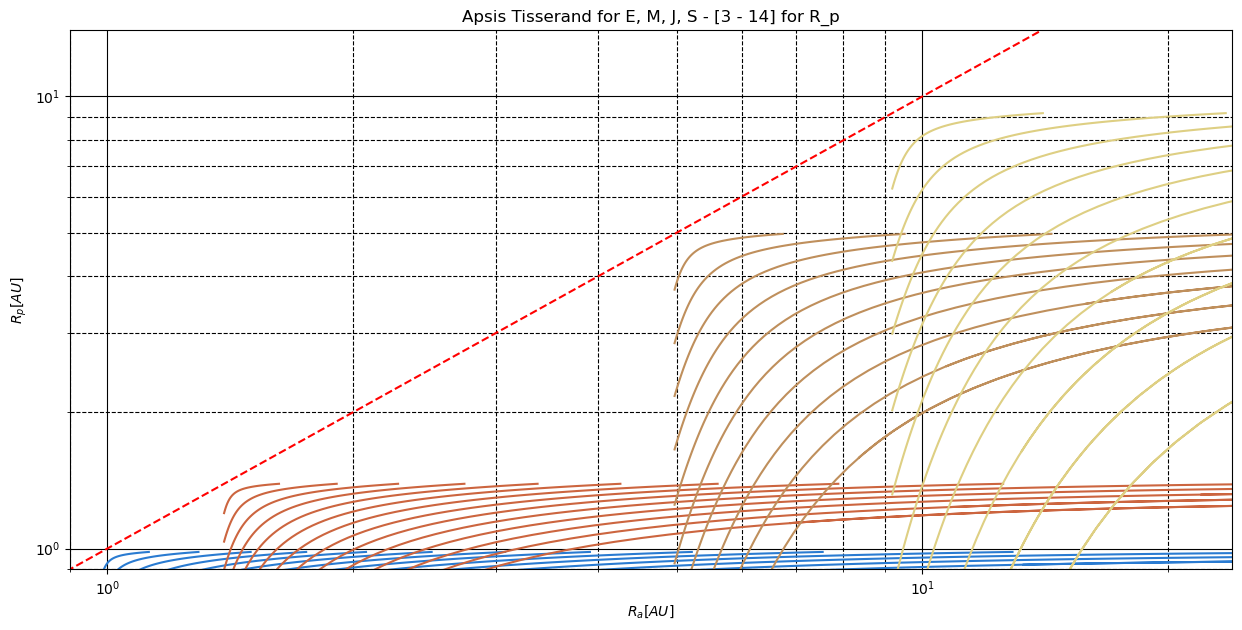

In [52]:
# MARS, EARTH, VENUS, JUPITER, SATURN 
# Prellocate Tisserand figure
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Apsis Tisserand for E, M, J, S - [3 - 14] for R_p")
ax.set_xlabel("$R_{a} [AU]$")
ax.set_ylabel("$R_{p} [AU]$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim((0.9, 24))
ax.set_ylim((0.9, 14))

ax.grid(b=True, which='major', color='k', linestyle='-', linewidth=0.8)

ax.grid(b=True, which='minor', color='k', linestyle='--', linewidth=0.8)

# Build tisserand
# APSIS: R_p vs R_a
# ENERGY: R_p vs Helio Specific Energy 
# PERIOD: vs PERIOD
tp = TisserandPlotter(axes=ax, kind=TisserandKind.APSIS)

# Show perfect circular orbits
r = np.linspace(0.5, 15) * u.AU
tp.ax.plot(r, r, linestyle="--", color="red")

# Generate lines for inner planets
for planet in SS_BODIES_INNER:
    tp.plot(planet, (1, 14) * u.km / u.s, num_contours=14)

# Generate lines for outter planets
for planet in SS_BODIES_OUTER:
    if planet == Jupiter or planet == Saturn:
        tp.plot(planet, (1, 10) * u.km / u.s, num_contours=10) #Specify number and value of V_inf for <planet> entry

C:\Users\pietr\AppData\Local\Temp\ipykernel_34972\3589082772.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='k', linestyle='-', linewidth=0.8)
C:\Users\pietr\AppData\Local\Temp\ipykernel_34972\3589082772.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='k', linestyle='--', linewidth=0.8)


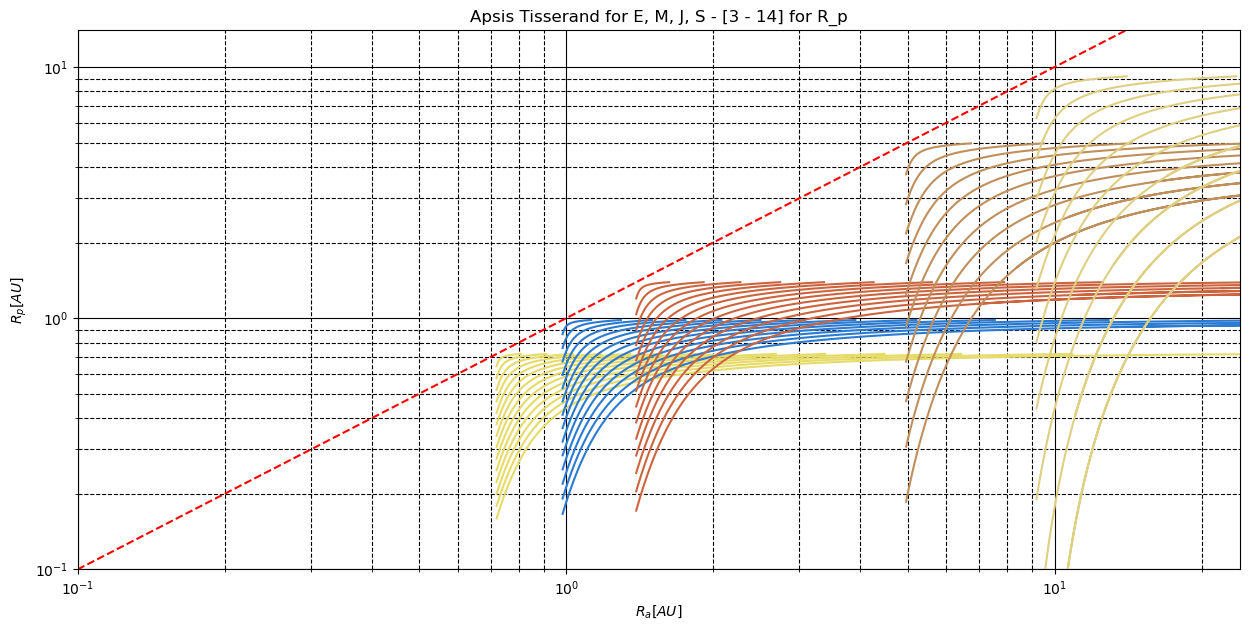

In [55]:
# MARS, EARTH, VENUS, JUPITER, SATURN 
# Prellocate Tisserand figure
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Apsis Tisserand for E, M, J, S - [3 - 14] for R_p")
ax.set_xlabel("$R_{a} [AU]$")
ax.set_ylabel("$R_{p} [AU]$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim((0.1, 24))
ax.set_ylim((0.1, 14))

ax.grid(b=True, which='major', color='k', linestyle='-', linewidth=0.8)

ax.grid(b=True, which='minor', color='k', linestyle='--', linewidth=0.8)

# Build tisserand
# APSIS: R_p vs R_a
# ENERGY: R_p vs Helio Specific Energy 
# PERIOD: vs PERIOD
tp = TisserandPlotter(axes=ax, kind=TisserandKind.APSIS)

# Show perfect circular orbits
r = np.linspace(0, 15) * u.AU
tp.ax.plot(r, r, linestyle="--", color="red")

# Generate lines for inner planets
for planet in SS_BODIES_INNER:
    tp.plot(planet, (1, 14) * u.km / u.s, num_contours=14)

# Generate lines for outter planets
for planet in SS_BODIES_OUTER:
    if planet == Jupiter or planet == Saturn:
        tp.plot(planet, (1, 10) * u.km / u.s, num_contours=10) #Specify number and value of V_inf for <planet> entry